# load data from xls

In [1]:
using RCall
using DataFrames
R"""
library('dplyr')
library(tidyr)
library('readxl')

d = read_excel('stiffler_table_S1.xlsx', skip=2, na="NaN")
d1 = d %>% select(1:7) %>%
  mutate(trial=1) %>%
  gather("concentration","fitness", 2:7)
d2 = d %>% select(9:14) %>%
  rename(Mutation=Mutation__1, `0`=`0__1`, `39`=`39__1`, `156`=`156__1`,`625`=`625__1`,`2500`=`2500__1`) %>%
  mutate(trial=2) %>%
  gather("concentration","fitness", 2:6)

d = bind_rows(d1, d2) %>%
  filter(!is.na(fitness)) %>%
  group_by(Mutation,trial) %>% filter(sum(fitness < -0.25)>0) %>% ungroup %>% filter(concentration != "0")
d.wt = d %>% count(trial, concentration) %>% select(-n) %>% mutate(Mutation="WT", fitness=0)
d = bind_rows(d.wt, d)
"""
@rget d

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,trial,concentration,Mutation,fitness
1,1.0,10,WT,0.0
2,1.0,156,WT,0.0
3,1.0,2500,WT,0.0
4,1.0,39,WT,0.0
5,1.0,625,WT,0.0
6,2.0,156,WT,0.0
7,2.0,2500,WT,0.0
8,2.0,39,WT,0.0
9,2.0,625,WT,0.0
10,1.0,10,H26C,0.00259131


## plotting libraries

In [2]:
using RCall
R"""
library(ggplot2)
library(cowplot)
options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width=600, height=600, ...))
""";

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [3]:
using GlobalEpistasis

In [4]:
data = prepdata(d, :Mutation, :listofmuts, "WT", :fitness, cname = :concentration)

Dict{Symbol,Any} with 9 entries:
  :ham  => [0, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  :wt   => "WT"
  :pos  => [26, 26, 26, 26, 26, 26, 26, 27, 27, 28  …  284, 285, 285, 285, 288,…
  :aa   => ['C', 'F', 'I', 'L', 'P', 'W', 'Y', 'A', 'G', 'P'  …  'C', 'C', 'D',…
  :y    => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00259131  …  -2.3384…
  :code => Dict("R43A"=>3112,"R259N"=>2672,"G238M"=>2449,"S203Q"=>1973,"V84H"=>…
  :c    => String["10", "156", "2500", "39", "625", "156", "2500", "39", "625",…
  :g    => Bool[false, true, true, true, true, true, true, true, true, true  … …
  :x    => …

## precomputed models

In [4]:
using JLD
using DataFrames
@load "inferred.jld" 

INFO: Recompiling stale cache file /home/jakub/.julia/lib/v0.6/FileIO.ji for module FileIO.
INFO: Recompiling stale cache file /home/jakub/.julia/lib/v0.6/JLD.ji for module JLD.


14-element Array{Symbol,1}:
 :data         
 :dl_cat_cont  
 :dl_lin_nonlin
 :dl_m00_m10   
 :dl_m10_m11   
 :dl_mrep      
 :m            
 :m00          
 :m10          
 :m11          
 :m_cat        
 :m_cc         
 :mb           
 :mlin         

In [80]:
#@save "inferred.jld" data mlin m mb dl_lin_nonlin dl_m00_m10 dl_m10_m11 m00 m10 m11 dl_cat_cont m_cc m_cat dl_mrep

# Non-epistatic model

In [115]:
@time mlin = nonepistatic_model(data)

  3.814919 seconds (204 allocations: 21.168 MiB, 0.28% gc time)


Dict{Symbol,Any} with 10 entries:
  :ll      => -14204.7
  :b       => [0.840295, -0.43005, -0.567271, -0.352042, -0.380607, -0.209854, …
  :method  => :leftdiv
  :phiG    => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0839869  …  -0.8…
  :phi     => [0.840295, 0.278182, -1.1063, 0.598068, -0.190095, 0.278182, -1.1…
  :yhat    => [0.840295, 0.278182, -1.1063, 0.598068, -0.190095, 0.278182, -1.1…
  :sigma2  => 0.218906
  :sigma2p => 1.0e-6
  :data    => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 0, 0, 0, 0, 0, 0, 0, …
  :r2      => 0.797944

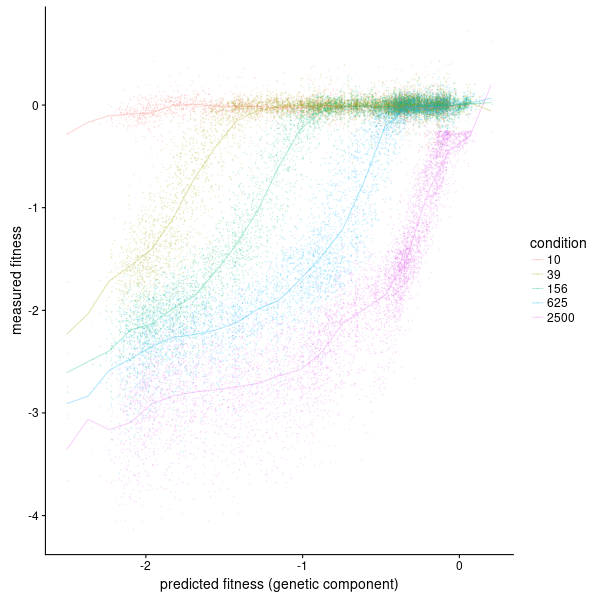

RCall.RObject{RCall.VecSxp}


In [6]:
R"""
plot.model.linear = qplot(x=$(mlin[:phiG]), y=$(mlin[:data][:y]), color=factor($(mlin[:data][:c])),
    alpha=I(0.1), size=I(0.2)) +
    xlab("predicted fitness (genetic component)") +
    ylab("measured fitness") + labs(color="condition") +
    stat_summary_bin(geom="line", fun.y=mean, alpha=0.3, bins=20)
"""

## cross validate

In [6]:
cvpredict(data, nonepistatic_model, 0, eachcondition = true)

1

2

3

4

5

6

7

8

9

"9 fold cross-validated correlation 0.8602001855113838"

28411-element Array{Float64,1}:
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.854605
  0.748185
  0.839587
  0.803485
  ⋮       
 -1.80641 
 -2.29199 
 -1.86789 
 -1.45701 
 -2.10627 
 -2.19716 
 -2.00157 
 -2.23799 
 -2.51169 
 -2.42177 
 -2.27396 
 -1.35262 

# Global epistasis

In [100]:
@time m = fit(mlin, a_upper_bound = [Inf, 0.0], tol=1e-16)

  8.009476 seconds (31.27 M allocations: 757.397 MiB, 3.85% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [5.80189, -0.75669, -1.38184, -0.676392, -0.750835, -0.4936…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.951322
  :be            => [5.80189, -2.77421, -3.22744, -3.84947, -4.8315]
  :prediction    => 28411×5 DataFrames.DataFrame…
  :phi           => [5.80189, 2.57445, 0.970381, 3.02768, 1.95241, 2.57445, 0.9…
  :yhat          => [-0.0146892, -0.0146892, -0.0148688, -0.0146892, -0.0146892…
  :sigma2        => 0.052738
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 0, 0, 0, 0, 0, …
  :a_upper_bound => [Inf, 0.0]
  :nlopt_return  => :SUCCESS
  :a             => [-1.92778, 0.0646305, 0.311731, 1.53673, 0.0, 0.0]
  :rmse          => 0.229648
  :beta          => 3312×3 DataFrames.DataFrame…
  :ll            => 41798.5

In [8]:
cvpredict(data, fit, 0, eachcondition=true, a_upper_bound = [Inf, 0.0])

1

2

3

4

5

6

7

8

9

"9 fold cross-validated correlation 0.9523581057327863"

28411-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
 -0.00044094
 -0.00485762
 -0.00233445
 -0.00419444
  ⋮         
 -2.26122   
 -2.59244   
 -2.29136   
 -1.57716   
 -2.50411   
 -2.56233   
 -2.34805   
 -2.57714   
 -2.68167   
 -2.65931   
 -2.59885   
 -0.681543  

## write parameters

In [40]:
using CSV
CSV.write("beta.csv", m[:beta])
CSV.write("predictions.csv", m[:prediction])

CSV.Sink{Void,DataType}(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        missingstring: ""
        dateformat: nothing
        decimal: '.'
        truestring: 'true'
        falsestring: 'false', IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "predictions.csv", 19, true, String["y", "yhat", "phiG", "c", "phiE"], 5, false, Val{false})

## bootstrap

In [ ]:
mb = boot(m, 1000)

In [132]:
b_boot, a_boot, g_boot = boot_stats(m, mb)

"beta 3312, positive 0, deleterious 3295, neutral 17 "

"beta average 95% CI width 0.2725831740950824"

"beta average SE, 0.0023498437434442436"

"g(phi) average CI 0.06519538188204466"

"g(phi) boundary [-4.14802, -3.43307]"

"g(phi) second deriv+ CI (-4.069372217089537, -3.8405905281905097)"

"g(phi) second deriv- CI (-3.790544533743847, -3.5474639892886293)"

(3312×9 DataFrames.DataFrame. Omitted printing of 3 columns
│ Row  │ name │ med        │ upper       │ lower     │ se         │ b          │
├──────┼──────┼────────────┼─────────────┼───────────┼────────────┼────────────┤
│ 1    │ 100C │ -0.533395  │ -0.41333    │ -0.796064 │ 0.0027709  │ -0.54099   │
│ 2    │ 101C │ -1.0232    │ -0.917614   │ -1.12656  │ 0.00173349 │ -0.987939  │
│ 3    │ 101F │ -0.476262  │ -0.371333   │ -0.605014 │ 0.00184873 │ -0.483582  │
│ 4    │ 101G │ -0.528186  │ -0.404666   │ -0.796278 │ 0.00279103 │ -0.536804  │
│ 5    │ 101I │ -0.34786   │ -0.25075    │ -0.437432 │ 0.00146095 │ -0.352925  │
│ 6    │ 101K │ -0.314538  │ -0.213706   │ -0.402778 │ 0.00155148 │ -0.31802   │
│ 7    │ 101L │ -0.287548  │ -0.176817   │ -0.376403 │ 0.0015874  │ -0.295165  │
│ 8    │ 101N │ -0.20491   │ -0.0367907  │ -0.312065 │ 0.00221059 │ -0.21288   │
│ 9    │ 101P │ -1.03709   │ -0.926964   │ -1.14271  │ 0.00171162 │ -1.00132   │
│ 10   │ 101R │ -0.42231   │ -0.320368   │ -0.525

## plot curves

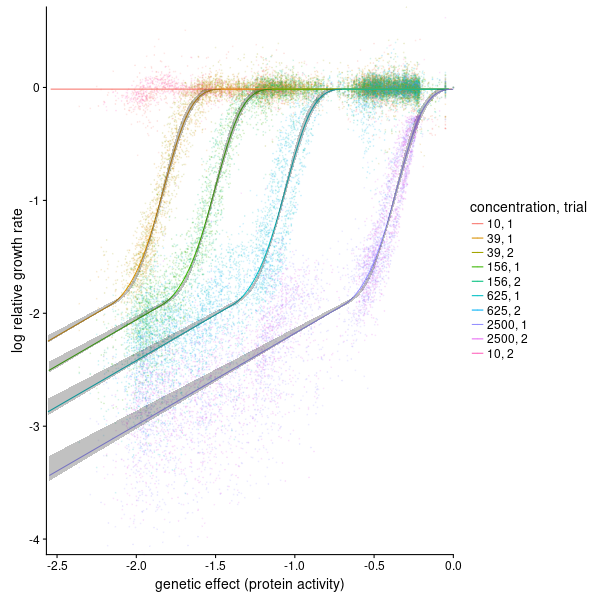

RCall.RObject{RCall.VecSxp}


In [133]:
R"""
library(dplyr)
df = $(m[:prediction])
library(forcats)
df$c = as_factor(paste0(df$c,", ", $d$trial))
$g_boot$c = fct_recode(factor($g_boot$c), `10, 1` = "10", `156, 1` = "156", `39, 1` = "39", `625, 1` = "625", `2500, 1`="2500")
df$c = fct_relevel(df$c, c("10, 1", "39, 1", "39, 2", "156, 1", "156, 2", "625, 1", "625, 2", "2500, 1", "2500, 2"))

plot.curve = qplot(data=df, x=phiG, y=y, color=c, alpha=I(0.1),
    size=I(0.3), xlab="genetic effect (protein activity)", ylab = "log relative growth rate") +
    geom_line(aes(y=yhat, x=phiG, color=factor(c)), $g_boot) +
    labs(color="concentration, trial") +
    geom_ribbon(data=$g_boot, aes(x=phiG, ymax=yhat_upper, ymin=yhat_lower, group=c), 
    inherit.aes=FALSE, alpha=0.3) +
    coord_cartesian(expand=FALSE)
"""

## plots betas

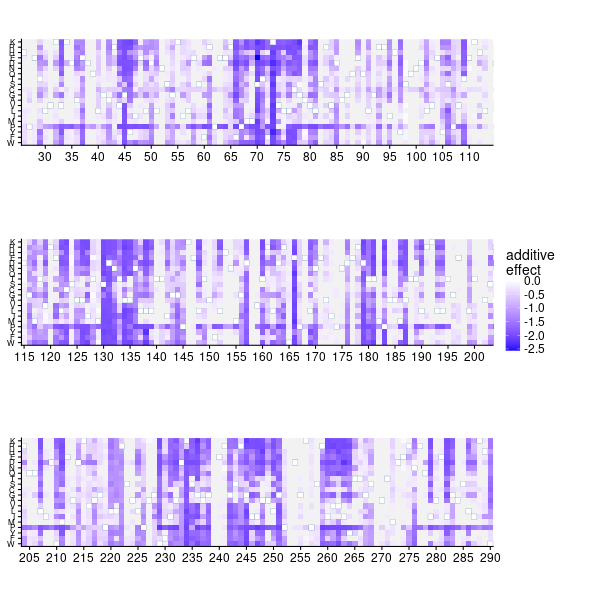

RCall.RObject{RCall.VecSxp}


In [134]:
aalev = reverse(["K", "R", "H", "E", "D", "N","Q","T","S","C","G","A","V","L","I","M","P", "Y", "F", "W"])
wtdf = DataFrame(pos = [p for (p,a) in data[:wt]], aa = [a for (p,a) in data[:wt]])
R"""
beta = $(m[:beta])
beta$aa = factor($(data[:aa]), levels=$aalev)
plot.beta1 <- ggplot(data=beta, aes(x=pos, y=aa, fill=b)) + geom_tile() +
scale_fill_gradient2(high="red", low="blue") +
#scale_color_gradient2(high="red", low="blue", guide="none") +
geom_tile(aes(x=pos, y=aa, color=0.0, fill=0), $wtdf) + scale_color_continuous(guide="none") +
scale_x_continuous(breaks=seq(30,290, 5)) +
ylab("amino acid") +
xlab("position") +
labs(fill = "additive\neffect") + 
theme(panel.grid = element_blank(), axis.title = element_blank(),
      panel.background = element_rect(fill = "grey95", color="grey95"),
        axis.text.y = element_text(size=8))


plot.beta.legend = get_legend(plot.beta1)
plot.beta = plot_grid(


plot.beta1 + coord_fixed(expand=FALSE, xlim=c(25.5,114.5)) + theme(legend.position="none"), NULL,
plot.beta1 + coord_fixed(expand=FALSE, xlim=c(114.5,203.5)) + theme(legend.position="none"), plot.beta.legend,
plot.beta1 + coord_fixed(expand=FALSE, xlim=c(203.5,290.5)) + theme(legend.position="none"), NULL,

ncol=2, nrow=3, align="v", axis='1', rel_widths=c(1,0.2))
"""

## boot betas

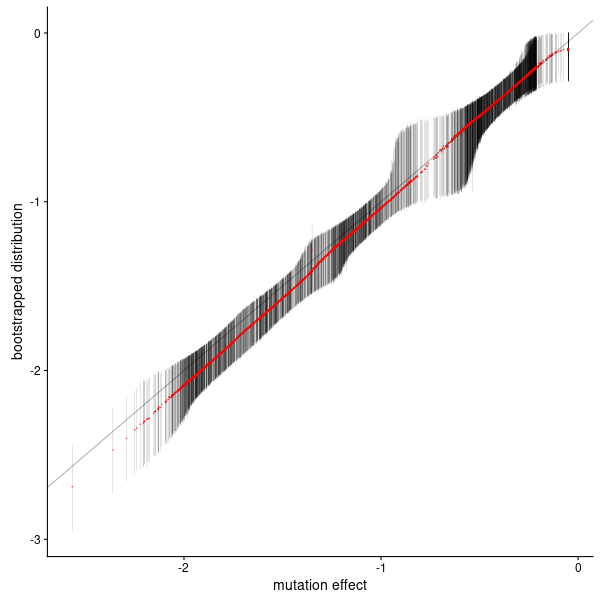

RCall.RObject{RCall.VecSxp}


In [135]:
R"""
plot.boot = qplot(data=$b_boot, x=b, y=med, ymin = lower, ymax=upper, size=I(.1), alpha=I(0.5),
    geom="linerange", xlab="mutation effect", ylab="bootstrapped distribution") +
    geom_point(size=0.2, color="red", alpha=0.5) + geom_abline(alpha=0.3)
"""

## stability


	Pearson's product-moment correlation

data:  `#JL`$beta$b and `#JL`$beta$DDG
t = 1.959, df = 9, p-value = 0.08178
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07906102  0.86343230
sample estimates:
      cor 
0.5467443 



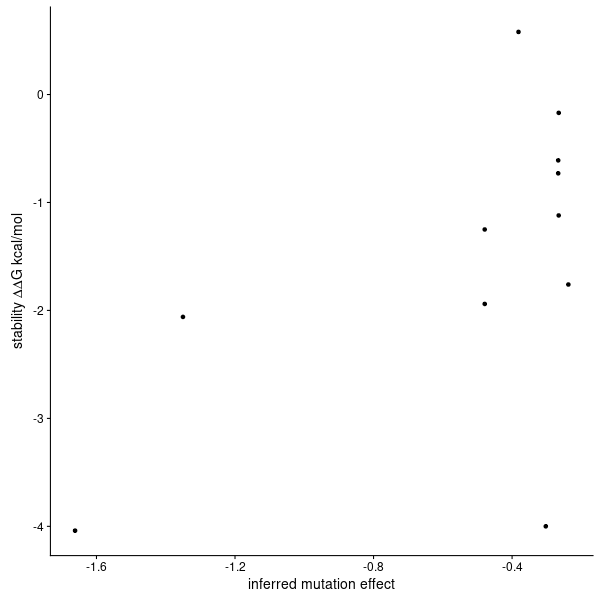

RCall.RObject{RCall.VecSxp}


In [136]:
wtdf2 = DataFrame(pos = [p for (p,a) in data[:wt]], wtaa = [a for (p,a) in data[:wt]])
beta = join(m[:beta], wtdf2, on=[:pos], kind=:inner)
beta[:Mutation] = ["$w$p$a" for (w,p,a) in zip(beta[:wtaa], beta[:pos], beta[:aa])]
using CSV
stab = CSV.read("stabilities.csv")
beta = join(beta, stab, on = :Mutation, kind= :inner)
R"""
print(cor.test($beta$b, $beta$DDG))
plot.stab = qplot(data=$beta, x=b, y=DDG, 
xlab=expression("inferred mutation effect"), 
ylab= expression(paste("stability ", Delta, Delta, "G kcal/mol")))
"""


## compare to firnberg

0.9631573515697002

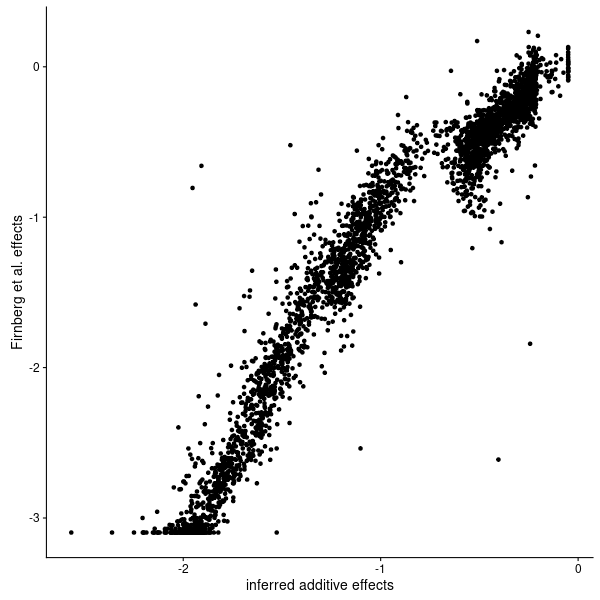

RCall.RObject{RCall.VecSxp}


In [130]:
using CSV
firn = CSV.read("firnberg.csv")
rename!(firn, :position => :pos)
rename!(firn, :f => :firnberg)
firn = join(m[:beta], firn, on = [:pos, :aa], kind = :inner)
display(cor(firn[:firnberg], firn[:b]))
R"""
plot.firn = qplot(data=$firn, x=b, y=firnberg) +
    labs(x = "inferred additive effects", y="Firnberg et al. effects")
"""

In [151]:
d[:mut] = [m[2:end] for m in d[:Mutation]]
firn[:mut] = ["$p$a" for (p,a) in zip(firn[:pos], firn[:aa])]
firn2 = join(d, firn, on=:mut)
by(firn2, :concentration, d -> cor(d[:firnberg],d[:fitness]))

,concentration,x1
1,10,0.0457606
2,39,0.734716
3,156,0.899102
4,625,0.910148
5,2500,0.795381


# hypothesis tests

## nonepistatic vs global

In [ ]:
dl_lin_nonlin = lrt(1000, mlin, 
            m -> boot(m, a_upper_bound=[Inf, 0.0]), 
            m -> fit(m, a_upper_bound=[Inf, 0.0]))

In [5]:
mean(dl_lin_nonlin .> m[:ll]-mlin[:ll])

0.0

## test slopes

In [36]:
@time m00 = fit(mlin, a_upper_bound = [0.0, 0.0])
@time m10 = fit(m00, a_upper_bound = [Inf, 0.0])
@time m11 = fit(m10, a_upper_bound = [Inf, Inf])

"constraining betas"

"constraining betas"

  2.793637 seconds (6.89 M allocations: 184.280 MiB, 2.20% gc time)


"constraining betas"

  6.936354 seconds (28.30 M allocations: 678.115 MiB, 3.41% gc time)
  2.853713 seconds (14.50 M allocations: 351.441 MiB, 3.17% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [13.7747, -0.738495, -1.36954, -0.658188, -0.732635, -0.475…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.95132
  :be            => [13.7747, -10.7538, -11.2075, -11.8343, -12.822]
  :prediction    => 28411×5 DataFrames.DataFrame…
  :phi           => [13.7747, 2.56713, 0.95263, 3.0209, 1.94041, 2.56713, 0.952…
  :yhat          => [-0.0150656, -0.0150656, -0.0158015, -0.0150656, -0.0150656…
  :sigma2        => 0.0527392
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:x, …
  :a_upper_bound => [Inf, Inf]
  :nlopt_return  => :SUCCESS
  :a             => [-1.92758, 0.0642368, 0.309906, 1.53837, 0.0, 0.0]
  :rmse          => 0.22965
  :beta          => 3312×3 DataFrames.DataFrame…
  :ll            => 41798.2

In [43]:
dl_m00_m10 = lrt(1000, m00, 
            m -> boot(m, a_upper_bound=[0.0, 0.0], tol=1e-12, constrainbeta=false), 
            m -> fit(m, a_upper_bound=[Inf, 0.0], tol=1e-12, constrainbeta=false))

"delta LL 3000.171768062595"

"p = 0.0"

1000-element Array{Float64,1}:
 0.275679  
 0.946876  
 0.0909264 
 3.2466    
 0.319145  
 0.0       
 0.00496684
 0.0       
 0.319581  
 0.0460445 
 0.232905  
 0.254039  
 0.0135507 
 ⋮         
 0.855656  
 0.290288  
 0.0       
 0.0       
 0.717931  
 0.0       
 6.7625e-5 
 0.0       
 0.368149  
 4.13421   
 0.0       
 1.13365   

In [44]:
mean(dl_m00_m10 .> m10[:ll]-m00[:ll])

0.0

In [45]:
m11[:ll]-m10[:ll]

0.114478871866595

In [46]:
dl_m10_m11 = lrt(1000, m10, 
           m -> boot(m, a_upper_bound=[Inf, 0.0], tol=1e-12, constrainbeta=false), 
           m -> fit(m, a_upper_bound=[Inf, Inf], tol=1e-12, constrainbeta=false))

"delta LL 0.266993771372654"

"p = 0.288"

1000-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 33.8506     
 29.3138     
  0.0        
  0.0        
  0.0        
 30.8014     
  0.0        
  0.0        
  0.0        
 13.632      
  ⋮          
 17.8451     
 20.6        
  0.0        
 20.0236     
  0.0        
 16.7335     
  0.0        
  0.00352691 
  0.0        
  0.0251954  
  2.47383e-10
 30.1456     

In [47]:
mean(dl_m10_m11 .> m11[:ll]-m10[:ll])

0.29

## continous vs categorical env

In [54]:
d[:cc] = log10.(parse.(Int64,d[:concentration]))-1
data_cont = prepdata(d, :Mutation, :listofmuts, "WT", :fitness, cname=:cc, condition_type=:continuous)
@time m_cc = fit(data_cont, a_upper_bound = [Inf, 0.0], constrainbeta=false)

 81.253933 seconds (418.53 M allocations: 9.656 GiB, 5.15% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [14.3976, -0.303797, -0.421403, -0.283419, -0.323805, -0.47…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.947834
  :be            => [14.3976, -5.62011]
  :prediction    => 28411×5 DataFrames.DataFrame…
  :phi           => [14.3976, 7.69206, 0.920867, 11.0757, 4.30451, 7.69206, 0.9…
  :yhat          => [-0.0166575, -0.0166575, -0.0202249, -0.0166575, -0.0166575…
  :sigma2        => 0.0565163
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 0, 0, 0, 0, 0, …
  :a_upper_bound => [Inf, 0.0]
  :nlopt_return  => :SUCCESS
  :a             => [-1.63088, 0.0144084, 0.0, 1.59981, 0.0, 0.0]
  :rmse          => 0.237732
  :beta          => 3312×3 DataFrames.DataFrame…
  :ll            => 40815.6

In [55]:
function cont2cat(mcont, datacat)
    mc = copy(mcont)
    mc[:data] = copy(mcont[:data])
    mc[:data][:x] = datacat[:x]
    mc[:data][:g] = datacat[:g]
    mc[:b] = [mc[:b][1:end-1]; (levels(mcont[:data][:c])*mcont[:be][2])[2:end]]
    mc
end
data_cat = prepdata(d, :Mutation, :listofmuts, "WT", :fitness, cname = :concentration)
@time m_cat = fit(cont2cat(m_cc, data_cat), constrainbeta=false)

 22.037937 seconds (124.94 M allocations: 2.879 GiB, 5.31% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [13.3389, -0.758279, -0.957159, -0.735893, -0.781888, -1.14…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.951044
  :be            => [13.3389, -5.43766, -11.8061, -3.46197, -8.01935]
  :prediction    => 28411×5 DataFrames.DataFrame…
  :phi           => [13.3389, 7.90129, 1.53283, 9.87698, 5.3196, 7.90129, 1.532…
  :yhat          => [-0.017958, -0.017958, -0.017958, -0.017958, -0.017958, -0.…
  :sigma2        => 0.0530384
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 0, 0, 0, 0, 0, …
  :a_upper_bound => [Inf, 0.0]
  :nlopt_return  => :SUCCESS
  :a             => [-1.65151, 0.0174821, 0.734605, 0.0, 0.881468, 0.0]
  :rmse          => 0.230301
  :beta          => 3312×3 DataFrames.DataFrame…
  :ll            => 41717.8

In [56]:
m_cat[:ll]-m_cc[:ll]

902.2311457484102

In [76]:
dl_cat_cont = lrt(1000, m_cc, 
            m -> boot(m, a_upper_bound=[Inf, 0.0], tol=1e-12, constrainbeta=false), 
            m -> fit(cont2cat(m, data_cat), a_upper_bound=[Inf, 0.0], tol=1e-12, constrainbeta=false))

"delta LL 902.2311457484102"

"p = 0.0"

1000-element Array{Float64,1}:
      1.96836
      6.45561
      5.97521
      2.53883
     10.394  
 -10930.0    
      2.60853
   -832.969  
      4.09979
      3.88078
 -10742.7    
     14.7877 
      8.55766
      ⋮      
      7.02131
      4.07623
      5.36554
      3.73427
      6.16602
      5.09135
      5.70994
      3.51429
      3.41169
      4.41246
      8.89317
      5.98801

In [77]:
mean(dl_cat_cont .> m_cat[:ll]-m_cc[:ll])

0.0

## trials together, vs trials as separate environments

In [60]:
d[:g] = string.(d[:trial], "_", d[:concentration])
datag = prepdata(d, :Mutation, :listofmuts, "WT", :fitness, cname=:g)
@time mg = fit(datag, a_upper_bound = [Inf, 0.0])

"constraining betas"

  9.912337 seconds (25.58 M allocations: 650.317 MiB, 4.70% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [18.7743, -0.303498, -0.439259, 0.0326807, -0.33265, -0.495…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.958211
  :be            => [18.7743, -16.3795, -17.7654, -15.9756, -16.8851, -16.4604,…
  :prediction    => 28411×5 DataFrames.DataFrame…
  :phi           => [18.7743, 2.39487, 1.00897, 2.7987, 1.88925, 2.31394, 0.867…
  :yhat          => [-0.0154524, -0.0154524, -0.0154524, -0.0154524, -0.0154524…
  :sigma2        => 0.0452739
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 0, 0, 0, 0, 0, …
  :a_upper_bound => [Inf, 0.0]
  :nlopt_return  => :SUCCESS
  :a             => [-1.93794, 0.0751966, 0.270423, 1.57687, 0.0, 0.0]
  :rmse          => 0.212777
  :beta          => 3312×3 DataFrames.DataFrame…
  :ll            => 43966.4

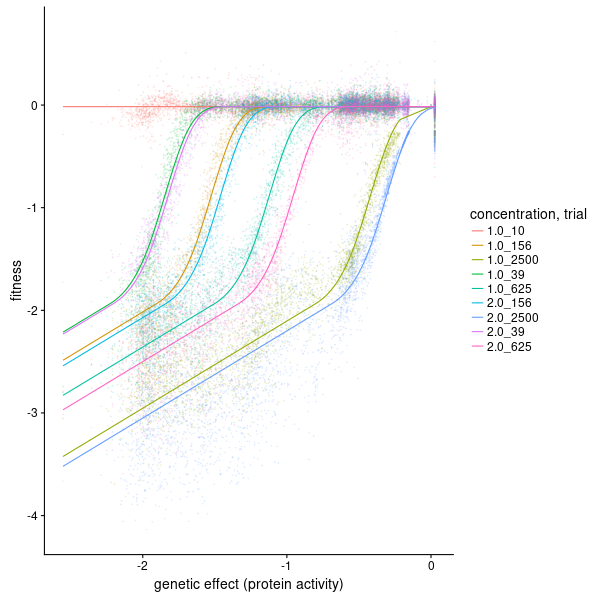

RCall.RObject{RCall.VecSxp}


In [30]:
R"""
qplot(data = $(mg[:prediction]), x=phiG, y=y, color=factor(c), alpha=I(0.1),
    size=I(0.3), xlab="genetic effect (protein activity)", ylab = "fitness") +
    geom_line(aes(y=yhat)) +
    labs(color="concentration, trial")
"""

In [74]:
function onetomanyreps(m, datag)
    mc = copy(m)
    mc[:data] = copy(m[:data])
    mc[:data][:x] = datag[:x]
    mc[:data][:g] = datag[:g]
    be = mc[:b][end-4:end]
    mc[:b] = [mc[:b][1]; mc[:b][m[:data][:g]]; be[3];be[5];be[2];be[4];be[3];be[5];be[2];be[4]]
    mc
end
data2 = prepdata(d, :Mutation, :listofmuts, "WT", :fitness, cname = :concentration)
@time m2 = fit(data2, a_upper_bound = [Inf, 0.0], tol=1e-16, constrainbeta=false)
fit(onetomanyreps(m2, datag), tol=1e-12)

 10

"constraining betas"

.113295 seconds (27.20 M allocations: 682.504 MiB, 4.09% gc time)


Dict{Symbol,Any} with 15 entries:
  :b             => [5.82113, -0.487198, -0.619691, -0.46076, -0.515378, -0.674…
  :knots         => 0.0:0.3333333333333333:1.0
  :r2            => 0.958543
  :be            => [5.82113, -3.2331, -4.63322, -2.83118, -3.73351, -3.31319, …
  :prediction    => 28411×5 DataFrames.DataFrame…
  :phi           => [5.82113, 2.58802, 1.1879, 2.98995, 2.08761, 2.50793, 1.053…
  :yhat          => [-0.0135873, -0.0135873, -0.0135873, -0.0135873, -0.0135873…
  :sigma2        => 0.0449138
  :data          => Dict{Symbol,Any}(Pair{Symbol,Any}(:ham, [0, 0, 0, 0, 0, 0, …
  :a_upper_bound => [Inf, 0.0]
  :nlopt_return  => :FTOL_REACHED
  :a             => [-1.94721, 0.0739838, 0.261821, 1.59782, 0.0, 0.0]
  :rmse          => 0.211929
  :beta          => 3312×3 DataFrames.DataFrame…
  :ll            => 44079.8

In [78]:
dl_mrep = lrt(1000, m2, m -> boot(m, tol=1e-12, constrainbeta=false), m -> fit(onetomanyreps(m2, datag), tol=1e-12, constrainbeta=false))

"delta LL 2281.2550922883966"

"p = 0.0"

1000-element Array{Float64,1}:
 405.288
 384.921
 349.905
 381.199
 382.058
 647.311
 350.442
 212.894
 448.762
 862.833
 551.437
 613.457
 564.694
   ⋮    
 470.988
 668.587
 347.07 
 315.026
 428.953
 361.064
 502.311
 245.174
 541.494
 354.509
 428.303
 583.029

In [79]:
mean(dl_mrep .> 2281)

0.0